In [283]:
from pathlib import Path

import pandas as pd
from icecream import colorize, ic

from backend.Database import Database

from icecream import ic, colorize

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

ic.configureOutput(outputFunction=lambda s: print(colorize(s) + "\n"))  # print debug
ic("bonjour");

ic| 'bonjour'



Creation dataframe

In [284]:
db = Database()
client = db.client


pipeline = [
    {
        "$lookup": {
            "from": "poubelle",
            "localField": "id_poubelle",
            "foreignField": "_id",
            "as": "poubelleInfo",
        },
    },
    {"$unwind": "$poubelleInfo"},
]


df = pd.DataFrame(list(client.historiquePoubelle.aggregate(pipeline)))
df

connexion to db established !



,_id,id_poubelle,coef_touristes,date,niveau_remplissage,poubelleInfo
0,6584ad110086777823b884ce,6584ad110086777823b884cd,1,2023-01-01,5,"{'_id': 6584ad110086777823b884cd, 'coef_touris..."
1,6584ad110086777823b884d0,6584ad110086777823b884cf,1,2023-01-01,18,"{'_id': 6584ad110086777823b884cf, 'coef_touris..."
2,6584ad110086777823b884d2,6584ad110086777823b884d1,1,2023-01-01,21,"{'_id': 6584ad110086777823b884d1, 'coef_touris..."
3,6584ad120086777823b884d4,6584ad120086777823b884d3,1,2023-01-01,12,"{'_id': 6584ad120086777823b884d3, 'coef_touris..."
4,6584ad120086777823b884d6,6584ad120086777823b884d5,1,2023-01-01,9,"{'_id': 6584ad120086777823b884d5, 'coef_touris..."
...,...,...,...,...,...,...
38492,6584b3d10086777823b91b9f,6584b3a10086777823b91759,1,2023-12-31,97,"{'_id': 6584b3a10086777823b91759, 'coef_touris..."
38493,6584b3d10086777823b91ba0,6584b3a10086777823b9175b,1,2023-12-31,92,"{'_id': 6584b3a10086777823b9175b, 'coef_touris..."
38494,6584b3d10086777823b91ba1,6584b3a00086777823b91757,1,2024-01-01,103,"{'_id': 6584b3a00086777823b91757, 'coef_touris..."
38495,6584b3d10086777823b91ba2,6584b3a10086777823b91759,1,2024-01-01,100,"{'_id': 6584b3a10086777823b91759, 'coef_touris..."


In [285]:
print(df.loc[0, "poubelleInfo"])

{'_id': ObjectId('6584ad110086777823b884cd'), 'coef_touristes': None, 'densite': None, 'id_zone': ObjectId('6584ad110086777823b884cc'), 'gps': '42°36\'39"N 9°21\'14"E', 'nextCollectionDate': None}


In [286]:
df["id_zone"] = df["poubelleInfo"].map(lambda x: x["id_zone"])
df["gps"] = df["poubelleInfo"].map(lambda x: x["gps"])

In [287]:
df

,_id,id_poubelle,coef_touristes,date,niveau_remplissage,poubelleInfo,id_zone,gps
0,6584ad110086777823b884ce,6584ad110086777823b884cd,1,2023-01-01,5,"{'_id': 6584ad110086777823b884cd, 'coef_touris...",6584ad110086777823b884cc,"42°36'39""N 9°21'14""E"
1,6584ad110086777823b884d0,6584ad110086777823b884cf,1,2023-01-01,18,"{'_id': 6584ad110086777823b884cf, 'coef_touris...",6584ad110086777823b884cc,"42°36'44""N 9°21'24""E"
2,6584ad110086777823b884d2,6584ad110086777823b884d1,1,2023-01-01,21,"{'_id': 6584ad110086777823b884d1, 'coef_touris...",6584ad110086777823b884cc,"42°36'51""N 9°21'17""E"
3,6584ad120086777823b884d4,6584ad120086777823b884d3,1,2023-01-01,12,"{'_id': 6584ad120086777823b884d3, 'coef_touris...",6584ad110086777823b884cc,"42°36'55""N 9°21'05""E"
4,6584ad120086777823b884d6,6584ad120086777823b884d5,1,2023-01-01,9,"{'_id': 6584ad120086777823b884d5, 'coef_touris...",6584ad110086777823b884cc,"42°37'01""N 9°21'20""E"
...,...,...,...,...,...,...,...,...
38492,6584b3d10086777823b91b9f,6584b3a10086777823b91759,1,2023-12-31,97,"{'_id': 6584b3a10086777823b91759, 'coef_touris...",6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"
38493,6584b3d10086777823b91ba0,6584b3a10086777823b9175b,1,2023-12-31,92,"{'_id': 6584b3a10086777823b9175b, 'coef_touris...",6584b3a00086777823b91756,"42°36'05""N 9°16'16""E"
38494,6584b3d10086777823b91ba1,6584b3a00086777823b91757,1,2024-01-01,103,"{'_id': 6584b3a00086777823b91757, 'coef_touris...",6584b3a00086777823b91756,"42°35'53""N 9°15'53""E"
38495,6584b3d10086777823b91ba2,6584b3a10086777823b91759,1,2024-01-01,100,"{'_id': 6584b3a10086777823b91759, 'coef_touris...",6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"


In [288]:
df = df.drop(columns=["_id", "gps", "poubelleInfo"])

In [289]:
df

,id_poubelle,coef_touristes,date,niveau_remplissage,id_zone
0,6584ad110086777823b884cd,1,2023-01-01,5,6584ad110086777823b884cc
1,6584ad110086777823b884cf,1,2023-01-01,18,6584ad110086777823b884cc
2,6584ad110086777823b884d1,1,2023-01-01,21,6584ad110086777823b884cc
3,6584ad120086777823b884d3,1,2023-01-01,12,6584ad110086777823b884cc
4,6584ad120086777823b884d5,1,2023-01-01,9,6584ad110086777823b884cc
...,...,...,...,...,...
38492,6584b3a10086777823b91759,1,2023-12-31,97,6584b3a00086777823b91756
38493,6584b3a10086777823b9175b,1,2023-12-31,92,6584b3a00086777823b91756
38494,6584b3a00086777823b91757,1,2024-01-01,103,6584b3a00086777823b91756
38495,6584b3a10086777823b91759,1,2024-01-01,100,6584b3a00086777823b91756


In [290]:
df_zone = pd.DataFrame(list(client.zone.find({})))
df_zone = df_zone.set_index("_id")
df_zone

,nom,gps,densite,nb_poubelles
_id,,,,
6584ad110086777823b884cc,Olmeta di tuda,None,442,None
6584ad860086777823b88ed6,Rapale,None,149,None
6584add50086777823b89602,Santu petro di tenda,None,360,None
6584ae170086777823b89c03,Barbaggio,None,266,None
6584aeb50086777823b8a984,Sorio,None,137,None
6584aed80086777823b8ac63,Pieve,None,118,None
6584aef80086777823b8af42,Oletta,None,1587,None
6584afd40086777823b8c2c3,Saint florent,None,1634,None
6584b1090086777823b8ddc4,Poggio oletta,None,218,None


In [291]:
id_to_pop = {}

for tup in df_zone.itertuples():
    id_to_pop[tup.Index] = tup.densite

In [292]:
df["densite"] = df["id_zone"].map(lambda x: id_to_pop[x])

In [293]:
df

,id_poubelle,coef_touristes,date,niveau_remplissage,id_zone,densite
0,6584ad110086777823b884cd,1,2023-01-01,5,6584ad110086777823b884cc,442
1,6584ad110086777823b884cf,1,2023-01-01,18,6584ad110086777823b884cc,442
2,6584ad110086777823b884d1,1,2023-01-01,21,6584ad110086777823b884cc,442
3,6584ad120086777823b884d3,1,2023-01-01,12,6584ad110086777823b884cc,442
4,6584ad120086777823b884d5,1,2023-01-01,9,6584ad110086777823b884cc,442
...,...,...,...,...,...,...
38492,6584b3a10086777823b91759,1,2023-12-31,97,6584b3a00086777823b91756,68
38493,6584b3a10086777823b9175b,1,2023-12-31,92,6584b3a00086777823b91756,68
38494,6584b3a00086777823b91757,1,2024-01-01,103,6584b3a00086777823b91756,68
38495,6584b3a10086777823b91759,1,2024-01-01,100,6584b3a00086777823b91756,68


In [294]:
df = df.drop(columns="id_zone")

In [295]:
df

,id_poubelle,coef_touristes,date,niveau_remplissage,densite
0,6584ad110086777823b884cd,1,2023-01-01,5,442
1,6584ad110086777823b884cf,1,2023-01-01,18,442
2,6584ad110086777823b884d1,1,2023-01-01,21,442
3,6584ad120086777823b884d3,1,2023-01-01,12,442
4,6584ad120086777823b884d5,1,2023-01-01,9,442
...,...,...,...,...,...
38492,6584b3a10086777823b91759,1,2023-12-31,97,68
38493,6584b3a10086777823b9175b,1,2023-12-31,92,68
38494,6584b3a00086777823b91757,1,2024-01-01,103,68
38495,6584b3a10086777823b91759,1,2024-01-01,100,68


In [296]:
def normalise_niveau(x):
    if x < 0:
        return 0
    elif x > 100:
        return 100
    else:
        return x

df["niveau_remplissage"] = df["niveau_remplissage"].map(normalise_niveau)

In [297]:
df["date"] = pd.to_datetime(df["date"])


In [298]:
df

,id_poubelle,coef_touristes,date,niveau_remplissage,densite
0,6584ad110086777823b884cd,1,2023-01-01,5,442
1,6584ad110086777823b884cf,1,2023-01-01,18,442
2,6584ad110086777823b884d1,1,2023-01-01,21,442
3,6584ad120086777823b884d3,1,2023-01-01,12,442
4,6584ad120086777823b884d5,1,2023-01-01,9,442
...,...,...,...,...,...
38492,6584b3a10086777823b91759,1,2023-12-31,97,68
38493,6584b3a10086777823b9175b,1,2023-12-31,92,68
38494,6584b3a00086777823b91757,1,2024-01-01,100,68
38495,6584b3a10086777823b91759,1,2024-01-01,100,68


In [299]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['num_poubelle'] = LE.fit_transform(df['id_poubelle'])

df

,id_poubelle,coef_touristes,date,niveau_remplissage,densite,num_poubelle
0,6584ad110086777823b884cd,1,2023-01-01,5,442,0
1,6584ad110086777823b884cf,1,2023-01-01,18,442,1
2,6584ad110086777823b884d1,1,2023-01-01,21,442,2
3,6584ad120086777823b884d3,1,2023-01-01,12,442,3
4,6584ad120086777823b884d5,1,2023-01-01,9,442,4
...,...,...,...,...,...,...
38492,6584b3a10086777823b91759,1,2023-12-31,97,68,101
38493,6584b3a10086777823b9175b,1,2023-12-31,92,68,102
38494,6584b3a00086777823b91757,1,2024-01-01,100,68,100
38495,6584b3a10086777823b91759,1,2024-01-01,100,68,101


In [300]:
df = df.drop(columns="id_poubelle")

<Axes: xlabel='date', ylabel='niveau_remplissage'>

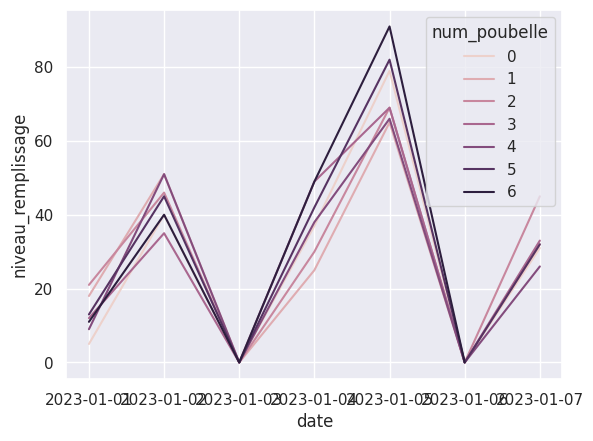

In [301]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="date", y="niveau_remplissage", hue="num_poubelle", data=df.iloc[:48,:])

In [302]:
df = df.sort_values(by=["num_poubelle", "date"]).reset_index(drop=True)
df

,coef_touristes,date,niveau_remplissage,densite,num_poubelle
0,1,2023-01-01,5,442,0
1,1,2023-01-02,40,442,0
2,1,2023-01-03,0,442,0
3,1,2023-01-04,37,442,0
4,1,2023-01-05,79,442,0
...,...,...,...,...,...
38492,1,2023-12-28,55,68,102
38493,1,2023-12-29,0,68,102
38494,1,2023-12-30,48,68,102
38495,1,2023-12-31,92,68,102


In [303]:
df["jour_semaine"] = df["date"].dt.day_name()
df

,coef_touristes,date,niveau_remplissage,densite,num_poubelle,jour_semaine
0,1,2023-01-01,5,442,0,Sunday
1,1,2023-01-02,40,442,0,Monday
2,1,2023-01-03,0,442,0,Tuesday
3,1,2023-01-04,37,442,0,Wednesday
4,1,2023-01-05,79,442,0,Thursday
...,...,...,...,...,...,...
38492,1,2023-12-28,55,68,102,Thursday
38493,1,2023-12-29,0,68,102,Friday
38494,1,2023-12-30,48,68,102,Saturday
38495,1,2023-12-31,92,68,102,Sunday


In [304]:
def categorize_period(x):
    month = int(x.strftime('%m'))
    
    if 6 <= month <= 8:
        return "high"
    elif 4 <= month <= 9:
        return "normal"
    else:
        return "low"

df["periode_touristes"] = df["date"].map(categorize_period)
df

,coef_touristes,date,niveau_remplissage,densite,num_poubelle,jour_semaine,periode_touristes
0,1,2023-01-01,5,442,0,Sunday,low
1,1,2023-01-02,40,442,0,Monday,low
2,1,2023-01-03,0,442,0,Tuesday,low
3,1,2023-01-04,37,442,0,Wednesday,low
4,1,2023-01-05,79,442,0,Thursday,low
...,...,...,...,...,...,...,...
38492,1,2023-12-28,55,68,102,Thursday,low
38493,1,2023-12-29,0,68,102,Friday,low
38494,1,2023-12-30,48,68,102,Saturday,low
38495,1,2023-12-31,92,68,102,Sunday,low


In [305]:
df.drop(columns="date", inplace=True)

In [306]:
df

,coef_touristes,niveau_remplissage,densite,num_poubelle,jour_semaine,periode_touristes
0,1,5,442,0,Sunday,low
1,1,40,442,0,Monday,low
2,1,0,442,0,Tuesday,low
3,1,37,442,0,Wednesday,low
4,1,79,442,0,Thursday,low
...,...,...,...,...,...,...
38492,1,55,68,102,Thursday,low
38493,1,0,68,102,Friday,low
38494,1,48,68,102,Saturday,low
38495,1,92,68,102,Sunday,low


In [307]:
list_difference_remplissage = [None,]

for i in range(1, len(df)):
    difference_remplissage = -1
    if df.loc[i-1, "num_poubelle"] == df.loc[i, "num_poubelle"]:
        difference_remplissage = df.loc[i, "niveau_remplissage"] - df.loc[i-1, "niveau_remplissage"]
    
    if difference_remplissage >= 0:
        list_difference_remplissage.append(difference_remplissage)
    else:
        list_difference_remplissage.append(None)

df["difference_remplissage"] = list_difference_remplissage

In [308]:
df

,coef_touristes,niveau_remplissage,densite,num_poubelle,jour_semaine,periode_touristes,difference_remplissage
0,1,5,442,0,Sunday,low,NaN
1,1,40,442,0,Monday,low,35.0
2,1,0,442,0,Tuesday,low,NaN
3,1,37,442,0,Wednesday,low,37.0
4,1,79,442,0,Thursday,low,42.0
...,...,...,...,...,...,...,...
38492,1,55,68,102,Thursday,low,20.0
38493,1,0,68,102,Friday,low,NaN
38494,1,48,68,102,Saturday,low,48.0
38495,1,92,68,102,Sunday,low,44.0


In [309]:
df = df[df["difference_remplissage"].notna()]
df

,coef_touristes,niveau_remplissage,densite,num_poubelle,jour_semaine,periode_touristes,difference_remplissage
1,1,40,442,0,Monday,low,35.0
3,1,37,442,0,Wednesday,low,37.0
4,1,79,442,0,Thursday,low,42.0
6,1,31,442,0,Saturday,low,31.0
7,1,42,442,0,Sunday,low,11.0
...,...,...,...,...,...,...,...
38491,1,35,68,102,Wednesday,low,35.0
38492,1,55,68,102,Thursday,low,20.0
38494,1,48,68,102,Saturday,low,48.0
38495,1,92,68,102,Sunday,low,44.0


In [311]:
target = "difference_remplissage"
df_y = df[target]
df_x = df.drop(columns=target)

,coef_touristes,densite,num_poubelle,jour_semaine,periode_touristes
1,1,442,0,Monday,low
3,1,442,0,Wednesday,low
4,1,442,0,Thursday,low
6,1,442,0,Saturday,low
7,1,442,0,Sunday,low
...,...,...,...,...,...
38491,1,68,102,Wednesday,low
38492,1,68,102,Thursday,low
38494,1,68,102,Saturday,low
38495,1,68,102,Sunday,low


,difference_remplissage,niveau_remplissage
1,35.0,40
3,37.0,37
4,42.0,79
6,31.0,31
7,11.0,42
...,...,...
38491,35.0,35
38492,20.0,55
38494,48.0,48
38495,44.0,92
